In [1]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
features = pd.read_csv('data/features.csv')
features.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [3]:
stores = pd.read_csv('data/stores.csv')
stores.head(3)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392


In [4]:
train = pd.read_csv('data/train.csv')
train.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False


In [5]:
len(train['Date'].unique())

143

In [6]:
test = pd.read_csv('data/test.csv')
test.head(3)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False


In [7]:
train = pd.merge(train, features, on=['Store', 'Date', 'IsHoliday'])
train = pd.merge(train, stores, on=['Store'])
train.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [8]:
len(test['Date'].unique())

39

In [9]:
test = pd.merge(test, features, on=['Store', 'Date', 'IsHoliday'])
test = pd.merge(test, stores, on=['Store'])
test.head(3)

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315


In [10]:
train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

In [11]:
mean_sales = train.groupby(['Date'])['Weekly_Sales'].mean().reset_index()

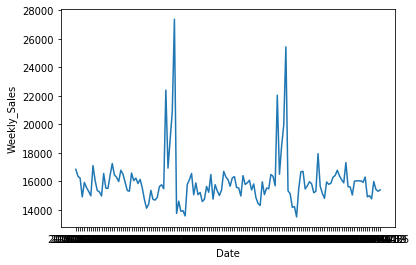

In [12]:
sns.lineplot(x='Date', y='Weekly_Sales', data=mean_sales)

In [13]:
medeian_sales = train.groupby(['Date'])['Weekly_Sales'].median().reset_index()

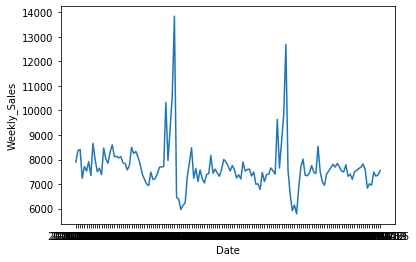

In [14]:
sns.lineplot(x='Date', y='Weekly_Sales', data=medeian_sales)

In [15]:
store_5 = train[train['Store'] == 5].groupby(['Date']).mean().reset_index()
store_31 = train[train['Store'] == 31].groupby(['Date']).mean().reset_index()

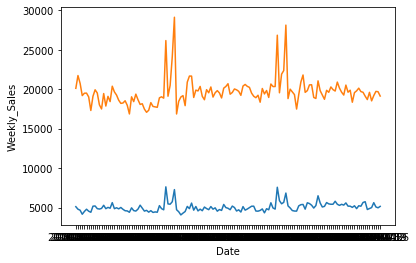

In [16]:
sns.lineplot(x='Date', y='Weekly_Sales', data=store_5)
sns.lineplot(x='Date', y='Weekly_Sales', data=store_31)

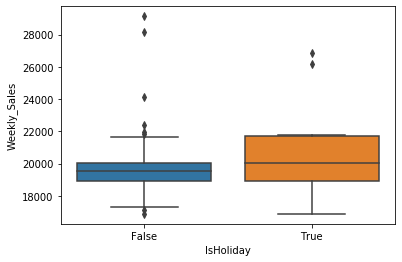

In [17]:
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=store_31)

In [18]:
train.corr()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
Store,1.000000,0.024004,-0.085195,-0.000548,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552,-0.182881
Dept,0.024004,1.000000,0.148032,0.000916,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837,-0.002966
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864,0.243828
IsHoliday,-0.000548,0.000916,0.012774,1.000000,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460,0.000593
Temperature,-0.050097,0.004437,-0.002312,-0.155949,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730,-0.058313
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853,0.003361
MarkDown1,-0.119588,-0.002426,0.085251,-0.035586,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285,0.345673
MarkDown2,-0.035173,0.000290,0.024130,0.334818,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940,0.108827
MarkDown3,-0.031556,0.001784,0.060385,0.427960,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818,0.048913
MarkDown4,-0.009941,0.004257,0.045414,-0.000562,-0.063947,-0.044986,0.819238,-0.007768,-0.071095,1.000000,0.107792,-0.049628,0.024963,0.168196


In [19]:
train['Date'] = pd.to_datetime(train['Date'], format='%Y-%m-%d')
train['Week'] = train.apply(lambda row: row.Date.strftime('%U'), axis=1)
train['Year'] = train.apply(lambda row: row.Date.strftime('%Y'), axis=1)

test['Date'] = pd.to_datetime(test['Date'], format='%Y-%m-%d')
test['Week'] = test.apply(lambda row: row.Date.strftime('%U'), axis=1)
test['Year'] = test.apply(lambda row: row.Date.strftime('%Y'), axis=1)

In [20]:
train = train.sort_values(by=['Date', 'Store', 'Dept'])
test = test.sort_values(by=['Date', 'Store', 'Dept'])

In [21]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,05,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,05,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,05,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,05,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,05,2010


In [22]:
test_date = test['Date']

train = train[['Store', 'Dept', 'IsHoliday', 'Size', 'Week', 'Year', 'Weekly_Sales']]
test = test[['Store', 'Dept', 'IsHoliday', 'Size', 'Week', 'Year']]

In [23]:
train['Sample weights'] = train.apply(lambda row: 5 if row.IsHoliday else 1, axis=1)
train.head(3)

,Store,Dept,IsHoliday,Size,Week,Year,Weekly_Sales,Sample weights
0,1,1,False,151315,05,2010,24924.50,1
1,1,2,False,151315,05,2010,50605.27,1
2,1,3,False,151315,05,2010,13740.12,1


In [24]:
y = train['Weekly_Sales']
X = train.drop(['Weekly_Sales'], axis=1)

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.272727)

w_train = X_train['Sample weights']
w_valid = X_valid['Sample weights']
X_train = X_train.drop(['Sample weights'], axis=1)
X_valid = X_valid.drop(['Sample weights'], axis=1)

X = X.drop(['Sample weights'], axis=1)

In [26]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [27]:
y_pred = model.predict(X_valid)

In [28]:
mean_absolute_error(y_pred, y_valid, sample_weight=w_valid)

1506.384491913591

In [29]:
pY = pd.DataFrame({'Weekly_Sales': y_pred}).reset_index()
pY.head()

,index,Weekly_Sales
0,0,8665.3169
1,1,68.6034
2,2,8656.3663
3,3,7448.6890
4,4,30479.1770


In [30]:
vY = pd.DataFrame({'Weekly_Sales': y_valid.values}).reset_index()
vY.head()

,index,Weekly_Sales
0,0,7437.78
1,1,-39.50
2,2,8006.93
3,3,6182.43
4,4,30549.41


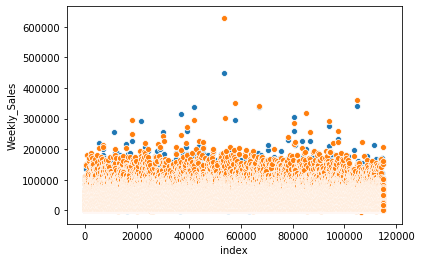

In [31]:
sns.scatterplot(x='index', y='Weekly_Sales', data=pY)
sns.scatterplot(x='index', y='Weekly_Sales', data=vY)

In [32]:
model.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [33]:
y_res = model.predict(test)

In [34]:
test['Date'] = test_date
test['Weekly_Sales'] = y_res
test.head()

,Store,Dept,IsHoliday,Size,Week,Year,Date,Weekly_Sales
0,1,1,False,151315,44,2012,2012-11-02,30214.0631
1,1,2,False,151315,44,2012,2012-11-02,45633.4691
2,1,3,False,151315,44,2012,2012-11-02,9398.2945
3,1,4,False,151315,44,2012,2012-11-02,36585.6515
4,1,5,False,151315,44,2012,2012-11-02,27447.0561


In [35]:
test['Id'] = test.apply(lambda row: f'{row["Store"]}_{row["Dept"]}_{row["Date"].strftime("%Y-%m-%d")}', axis=1)
test.head()

,Store,Dept,IsHoliday,Size,Week,Year,Date,Weekly_Sales,Id
0,1,1,False,151315,44,2012,2012-11-02,30214.0631,1_1_2012-11-02
1,1,2,False,151315,44,2012,2012-11-02,45633.4691,1_2_2012-11-02
2,1,3,False,151315,44,2012,2012-11-02,9398.2945,1_3_2012-11-02
3,1,4,False,151315,44,2012,2012-11-02,36585.6515,1_4_2012-11-02
4,1,5,False,151315,44,2012,2012-11-02,27447.0561,1_5_2012-11-02


In [36]:
submission = test[['Id', 'Weekly_Sales']].set_index(['Id'])
submission.head()

,Weekly_Sales
Id,
1_1_2012-11-02,30214.0631
1_2_2012-11-02,45633.4691
1_3_2012-11-02,9398.2945
1_4_2012-11-02,36585.6515
1_5_2012-11-02,27447.0561


In [37]:
submission.to_csv('data/submission.csv')